In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '3'

from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from signal_utils_1D import *
from plot_utils_1D import *


In [ ]:
# num_nyquist_samples = NUM_NYQUIST_SAMPLES
num_nyquist_samples = 8

sampling_indices = (0, 1)
use_sampling_indices = True
num_grid_points = 10
delta_function = onp.zeros(OBJECT_LENGTH)
delta_function[delta_function.size // 2] = 1
object = delta_function

target_signals = make_intensity_coordinate_sampling_grid(sampling_indices, sample_n=num_grid_points,
                                                         num_nyquist_samples=num_nyquist_samples, randomize_non_sampling_indices=True)
optimized_kernels, output_signals = optimize_towards_target_signals(target_signals, object,
                                                                    sampling_indices=sampling_indices if use_sampling_indices else None,
                                                                    verbose=True)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plot_in_intensity_coordinates(ax, output_signals, label='optimized signals',  sample_point_indices=sampling_indices)
plot_in_intensity_coordinates(ax, target_signals, label='target signals',  marker='x',  sample_point_indices=sampling_indices, color=get_color_cycle()[2])
ax.legend()
fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + f'optimizing_to_different_target_grid_sample_indices_{use_sampling_indices}' + '.pdf', transparent=True)


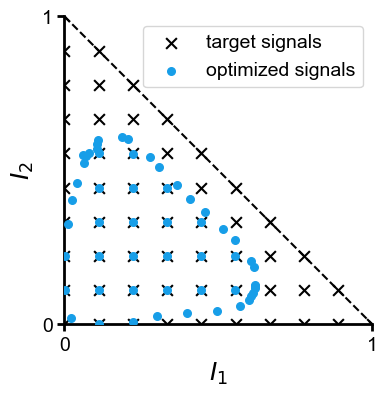

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plot_in_intensity_coordinates(ax, target_signals, label='target signals',  marker='x', markersize=60,
                               sample_point_indices=sampling_indices, color='k')
plot_in_intensity_coordinates(ax, output_signals, label='optimized signals',  sample_point_indices=sampling_indices)

ax.set(xticks=[0, 1], yticks=[0, 1])
ax.legend()
fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + f'optimizing_to_different_target_grid_sample_indices_{use_sampling_indices}' + '.pdf', transparent=True)


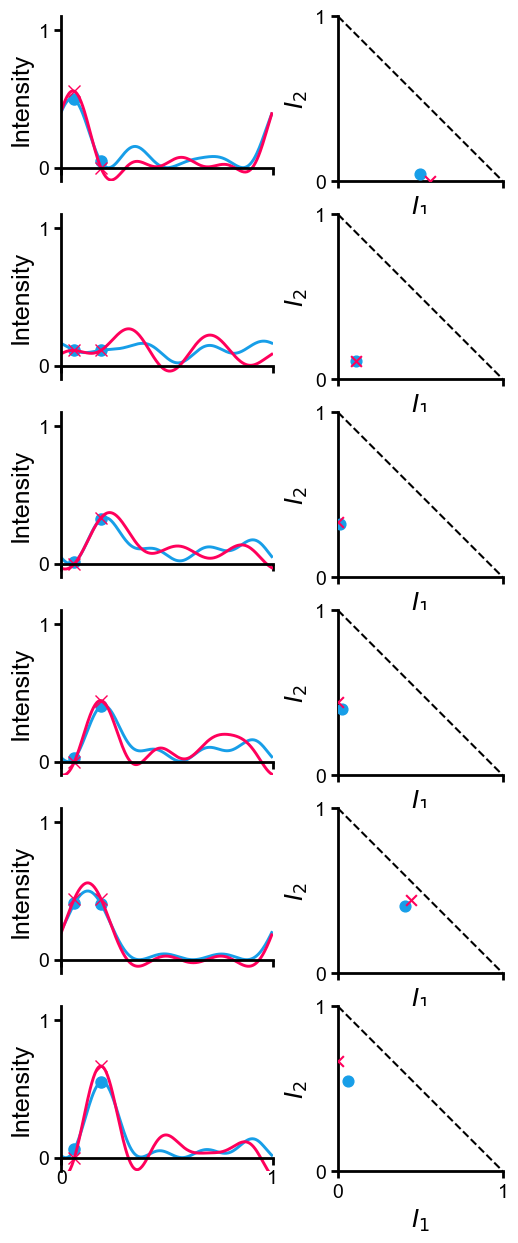

In [27]:
from signal_utils_1D import *

sampling_indices = (0, 1)
num_nyquist_samples = NUM_NYQUIST_SAMPLES
num_nyquist_samples = 8

sampling_indices = (0, 1)
num_grid_points = 4
delta_function = onp.zeros(OBJECT_LENGTH)
delta_function[delta_function.size // 2] = 1
object = delta_function


# indices = np.arange(10)
indices = onp.random.choice(np.arange(target_signals.shape[0]), size=6, replace=False)


# make a 2x6 grid with spatial plots on top and intensity plots on bottom
fig, ax = plt.subplots(len(indices), 2, figsize=(6, len(indices)*2.5), sharex='col')
for i, (ax1, ax2) in enumerate(zip(ax[:, 0], ax[:, 1])):
    output_signal = output_signals[indices[i]]
    target_signal = target_signals[indices[i]]

    plot_in_spatial_coordinates(ax1, output_signal, label='optimized signals', sample_point_indices=sampling_indices,
                                color_samples=True, show_samples=True, xlabel=None)
    plot_in_spatial_coordinates(ax1, target_signal, label='target signals', marker='x', color_samples=True,
                                color=get_color_cycle()[2],
                                sample_point_indices=sampling_indices, show_samples=True, xlabel=None)
    ax1.set(ylim=(-0.1, 1.1), yticks=[0, 1], xticks=[0, 1])
    ax1.spines['bottom'].set_position(('data', 0))

    plot_in_intensity_coordinates(ax2, output_signal, label='optimized signals', sample_point_indices=sampling_indices, markersize=60)
    plot_in_intensity_coordinates(ax2, target_signal, label='target signals', marker='x', color=get_color_cycle()[2],
                                   sample_point_indices=sampling_indices, markersize=60)
    ax2.set(yticks=[0, 1], xticks=[0, 1])

fig.savefig('/home/hpinkard_waller/figures/1d_signals/' + 'optimizing_to_different_targets' + '.pdf', transparent=True)
